### Name: Jie Lu; NetID: jl4961
### Name: Mingyang Ni; UNI: mn2813

## Task 1

### 1.1 Use the title only

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
train = pd.read_csv("hw5_data_train.csv")
test = pd.read_csv("hw5_data_test.csv")

In [3]:
train.shape, test.shape

((17614, 3), (5872, 3))

In [4]:
train.apply(lambda x: sum(x.isnull())).rename("num_missing")

Title          2852
Review          629
Recommended       0
Name: num_missing, dtype: int64

In [5]:
train["Title"] = train["Title"].fillna('')
train["Review"] = train["Review"].fillna('')
test["Title"] = test["Title"].fillna('')
test["Review"] = test["Review"].fillna('')

In [6]:
X_train = train['Title']
X_test = test['Title']
y_train = train['Recommended'].ravel()
y_test = test['Recommended'].ravel()

### 1.1 Without Regularization

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
pipe_1 = make_pipeline(CountVectorizer(), LogisticRegression())
pipe_1.fit(X_train, y_train)
lr_score_1 = cross_validate(pipe_1, X_train, y_train, scoring='roc_auc')

In [124]:
print("Training score for log before tuning: ",np.mean(lr_score_1['test_score']))

Training score for log before tuning:  0.8869176248282994


In [8]:
# That's the plot function from the class github site
def plot_important_features(coef, feature_names, top_n=20, ax=None, rotation=60):
    if ax is None:
        ax = plt.gca()
    inds = np.argsort(coef)
    low = inds[:top_n]
    high = inds[-top_n:]
    important = np.hstack([low, high])
    myrange = range(len(important))
    colors = ['red'] * top_n + ['blue'] * top_n
    
    ax.bar(myrange, coef[important], color=colors)
    ax.set_xticks(myrange)
    ax.set_xticklabels(feature_names[important], rotation=rotation, ha="right")
    ax.set_xlim(-.7, 2 * top_n)
    ax.set_frame_on(False)

In [9]:
feature_names = pipe_1.named_steps['countvectorizer'].get_feature_names()
coef = pipe_1.named_steps['logisticregression'].coef_.ravel()

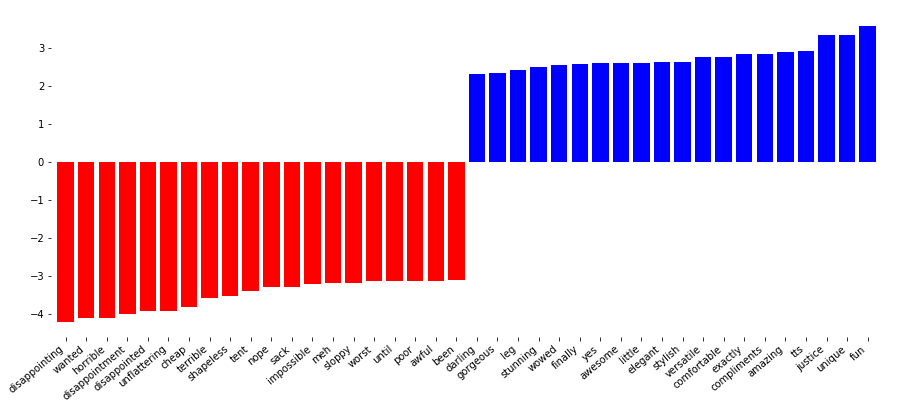

In [126]:
plt.figure(figsize=(15, 6))
plot_important_features(lr.coef_.ravel(), np.array(feature_names), top_n=20, rotation=40)
ax = plt.gca()

### 1.1 With Regularization 

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

param_grid_log = { 'logisticregression__C': [0.01,0.1,1,10]}
pipe_log_title = make_pipeline(CountVectorizer(), LogisticRegression(), memory="cache_folder")  
grid_log_title = GridSearchCV(pipe_log_title, param_grid_log, scoring='roc_auc') 

In [70]:
grid_log_title.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory='cache_folder',
     steps=[('countvectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
  ...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'logisticregression__C': [0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [71]:
print("Best regularization for log regression:", grid_log_title.best_params_)
print("Best training score for log after tuning:", grid_log_title.best_score_)

Best regularization for log regression: {'logisticregression__C': 1}
Best training score for log after tuning: 0.8869175501007229


In [13]:
# Use the pipeline best estimator attributes to extract the names and coefficient
feature_names = grid_log_title.best_estimator_.named_steps['countvectorizer'].get_feature_names()
coef = grid_log_title.best_estimator_.named_steps['logisticregression'].coef_.ravel()

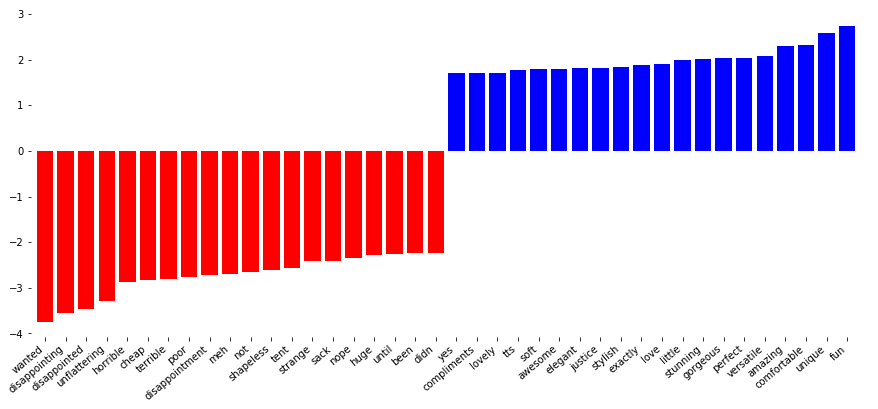

In [14]:
# feature importance graph
plt.figure(figsize=(15, 6))
plot_important_features(coef, np.array(feature_names), top_n=20, rotation=40)
ax = plt.gca()

### 1.2 Use the review only

In [11]:
X_train = train['Review']
X_test = test['Review']
y_train = train['Recommended'].ravel()
y_test = test['Recommended'].ravel()

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

### Without Regularization

In [95]:
pipe_2 = make_pipeline(CountVectorizer(), LogisticRegression(),memory="cache_folder")  
pipe_2.fit(X_train, y_train)
lr_score_2 = cross_validate(pipe_2, X_train, y_train, scoring='roc_auc')

In [96]:
print("Training score for log before tuning: ",np.mean(lr_score_2['test_score']))

Training score for log before tuning:  0.8846372260952284


In [101]:
feature_names = pipe_2.named_steps['countvectorizer'].get_feature_names()
coef = pipe_2.named_steps['logisticregression'].coef_.ravel()

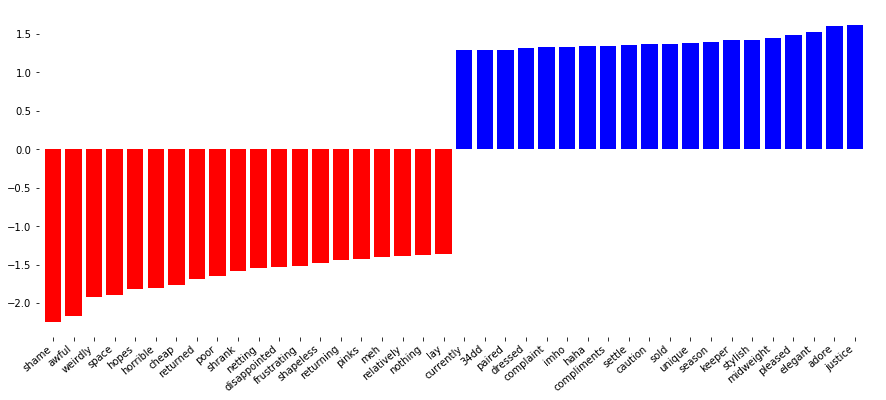

In [102]:
# feature importance graph
plt.figure(figsize=(15, 6))
plot_important_features(coef, np.array(feature_names), top_n=20, rotation=40)
ax = plt.gca()

### 1.2 With Regularization 

In [15]:
param_grid_log = { 'logisticregression__C': [0.01,0.1,1,10]}
pipe_log_review = make_pipeline(CountVectorizer(), LogisticRegression(), memory="cache_folder")  
grid_log_review = GridSearchCV(pipe_log_review, param_grid_log, scoring='roc_auc') 

In [17]:
grid_log_review.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory='cache_folder',
     steps=[('countvectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
  ...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'logisticregression__C': [0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [18]:
print("Best regularization for log regression:", grid_log_review.best_params_)
print("Best training score for log after tuning:", grid_log_review.best_score_)

Best regularization for log regression: {'logisticregression__C': 0.1}
Best training score for log after tuning: 0.9201354109206789


In [19]:
# Use the pipeline best estimator attributes to extract the names and coefficient
feature_names = grid_log_review.best_estimator_.named_steps['countvectorizer'].get_feature_names()
coef = grid_log_review.best_estimator_.named_steps['logisticregression'].coef_.ravel()

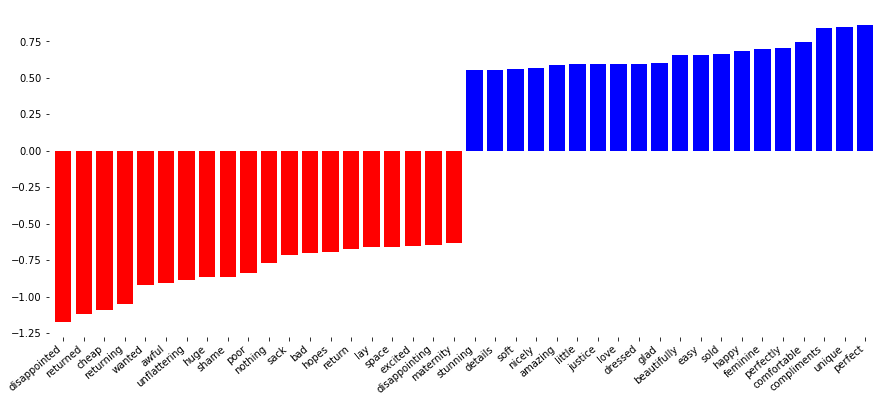

In [20]:
# feature importance graph
plt.figure(figsize=(15, 6))
plot_important_features(coef, np.array(feature_names), top_n=20, rotation=40)
ax = plt.gca()

### 1.3 Concatenate the title and review to a single text and analyze that (discarding the information which words were in the title and which in the body) 

In [12]:
train["total"] = train["Title"] + ' '+ train["Review"]
test["total"] = test["Title"] + ' '+ test["Review"]

In [13]:
X_train = train['total']
X_test = test['total']
y_train = train['Recommended'].ravel()
y_test = test['Recommended'].ravel()

### 1.3 Without Regularization 

In [130]:
pipe_3 = make_pipeline(CountVectorizer(), LogisticRegression(),memory="cache_folder")  
pipe_3.fit(X_train, y_train)
lr_score_3 = cross_validate(pipe_3, X_train, y_train, scoring = 'roc_auc')

In [131]:
print("Training score for log before tuning: ",np.mean(lr_score_3['test_score']))

Training score for log before tuning:  0.9266506342303152


In [132]:
feature_names = pipe_3.named_steps['countvectorizer'].get_feature_names()
coef = pipe_3.named_steps['logisticregression'].coef_.ravel()

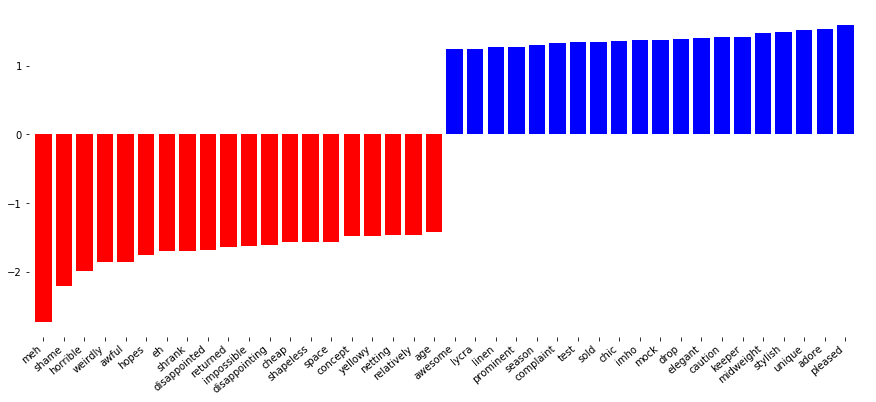

In [133]:
# feature importance graph
plt.figure(figsize=(15, 6))
plot_important_features(coef, np.array(feature_names), top_n=20, rotation=40)
ax = plt.gca()

### 1.3 With Regularization 

In [23]:
param_grid_log = { 'logisticregression__C': [0.01,0.1,1,10]}
pipe_log_total_1 = make_pipeline(CountVectorizer(), LogisticRegression(), memory="cache_folder")  
grid_log_total_1 = GridSearchCV(pipe_log_total_1, param_grid_log, scoring='roc_auc') 

In [24]:
grid_log_total_1.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory='cache_folder',
     steps=[('countvectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
  ...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'logisticregression__C': [0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [25]:
print("Best regularization for log regression:", grid_log_total_1.best_params_)
print("Best training score for log after tuning:", grid_log_total_1.best_score_)

Best regularization for log regression: {'logisticregression__C': 0.1}
Best training score for log after tuning: 0.9368535828985899


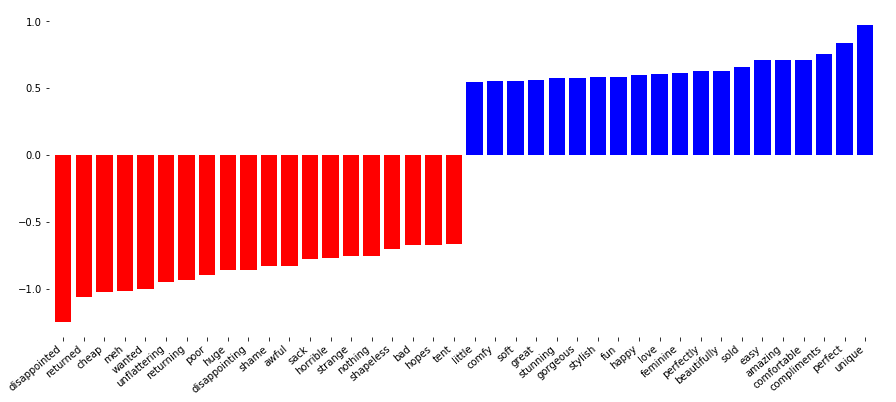

In [29]:
# Use the pipeline best estimator attributes to extract the names and coefficient
feature_names = grid_log_total_1.best_estimator_.named_steps['countvectorizer'].get_feature_names()
coef = grid_log_total_1.best_estimator_.named_steps['logisticregression'].coef_.ravel()

# feature importance graph
plt.figure(figsize=(15, 6))
plot_important_features(coef, np.array(feature_names), top_n=20, rotation=40)
ax = plt.gca()

### 1.4 Vectorizing title and review individually and concatenating the vector representations

In [162]:
vect1 = CountVectorizer()
vect2 = CountVectorizer()
title = vect1.fit_transform(train['Title'])
review = vect2.fit_transform(train['Review'])

In [168]:
# Concatenate 2 sparse matrix
from scipy.sparse import coo_matrix, hstack
X_train = hstack([title, review])
y_train = train['Recommended'].ravel()

### 1.4 Without Regularization 

In [169]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_score_4 = cross_validate(lr , X_train, y_train, scoring = 'roc_auc')

In [170]:
print("Training score for log before tuning: ",np.mean(lr_score_4['test_score']))

Training score for log before tuning:  0.9298220298200498


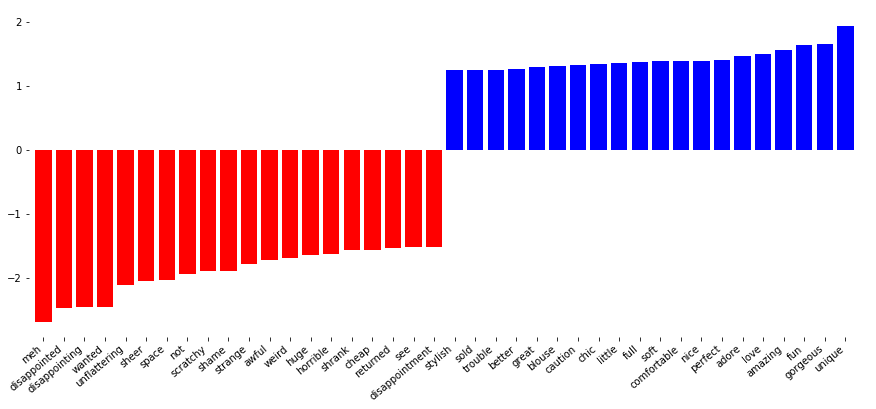

In [182]:
feature_names = vect1.get_feature_names()+vect2.get_feature_names()
plt.figure(figsize=(15, 6))
plot_important_features(lr.coef_.ravel(), np.array(feature_names), top_n=20, rotation=40)
ax = plt.gca()

### 1.4 With Regularization 

In [184]:
param_grid_log = { 'C': [0.01,0.1,1,10]}
grid_log_total_2 = GridSearchCV(LogisticRegression(), param_grid_log, scoring='roc_auc') 
grid_log_total_2.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.01, 0.1, 1, 10]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='roc_auc', verbose=0)

In [185]:
print("Best regularization for log regression:", grid_log_total_2.best_params_)
print("Best training score for log after tuning:", grid_log_total_2.best_score_)

Best regularization for log regression: {'C': 0.1}
Best training score for log after tuning: 0.936455043973577


In [189]:
coef = grid_log_total_2.best_estimator_.coef_.ravel()
feature_names = vect1.get_feature_names()+vect2.get_feature_names()

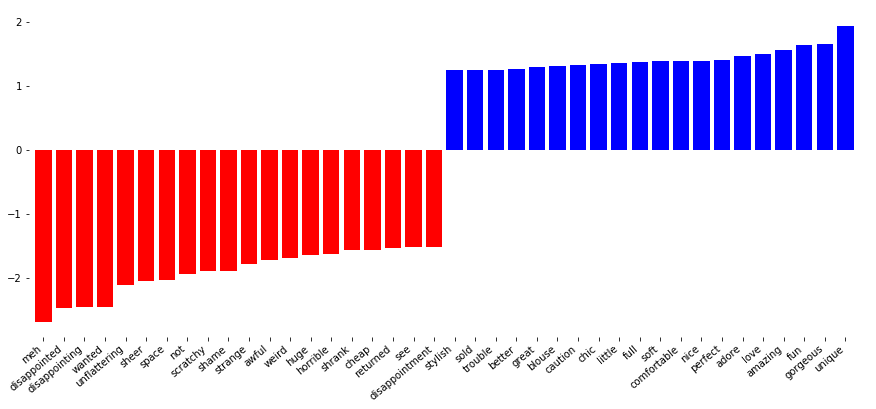

In [190]:
feature_names = vect1.get_feature_names()+vect2.get_feature_names()
plt.figure(figsize=(15, 6))
plot_important_features(lr.coef_.ravel(), np.array(feature_names), top_n=20, rotation=40)
ax = plt.gca()

### Task 1 Conclusion: Among all the 4 approaches, the third one will give us the best CV AUC score on train set. Let's see how good it will perform on the test set:

In [201]:
X_train = train['total']
X_test = test['total']
y_train = train['Recommended'].ravel()
y_test = test['Recommended'].ravel()

In [203]:
print("Best training score for Task 1.3 after tuning:", grid_log_total_1.best_score_)
print("Score on test set for Task 1.3 after tuning:", grid_log_total_1.score(X_test, y_test))

Best training score for Task 1.3 after tuning: 0.9368535828985899
Score on test set for Task 1.3 after tuning: 0.9336780997357965


## Task 2

### 2.1 Try using TfidfVectorizer instead of CountVectorizer. Does it change the score? Does it change the important coefficients?


Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
train = pd.read_csv("hw5_data_train.csv")
test = pd.read_csv("hw5_data_test.csv")

In [20]:
y_train = train['Recommended'].ravel()
y_test = test['Recommended'].ravel()

In [21]:
X_train = train.drop(['Recommended'], axis = 1)
X_test = test.drop(['Recommended'], axis = 1)

In [42]:
# Deal with null number, concatenate the total train

train["Title"] = train["Title"].fillna('')
train["Review"] = train["Review"].fillna('')
train["total"] = train["Title"] + ' '+ train["Review"]

test["Title"] = test["Title"].fillna('')
test["Review"] = test["Review"].fillna('')
test["total"] = test["Title"] + ' '+ test["Review"]

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

param_grid_log = { 'logisticregression__C': np.logspace(-3, 3, 7)}
pipe_log = make_pipeline(TfidfVectorizer(), LogisticRegression(), memory="cache_folder")  
grid_log = GridSearchCV(pipe_log, param_grid_log, scoring='roc_auc') 

In [268]:
X_train = train['total']
grid_log.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory='cache_folder',
     steps=[('tfidfvectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_i...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'logisticregression__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [55]:
X_test = test['total']

In [83]:
print("Best regularization for log regression:", grid_log.best_params_)
print("Best training score for log after tuning:", grid_log.best_score_)

Best regularization for log regression: {'logisticregression__C': 1.0}
Best training score for log after tuning: 0.9450709531086035


In [82]:
# Use the pipeline best estimator attributes to extract the names and coefficient
feature_names = grid_log.best_estimator_.named_steps['tfidfvectorizer'].get_feature_names()
coef = grid_log.best_estimator_.named_steps['logisticregression'].coef_.ravel()

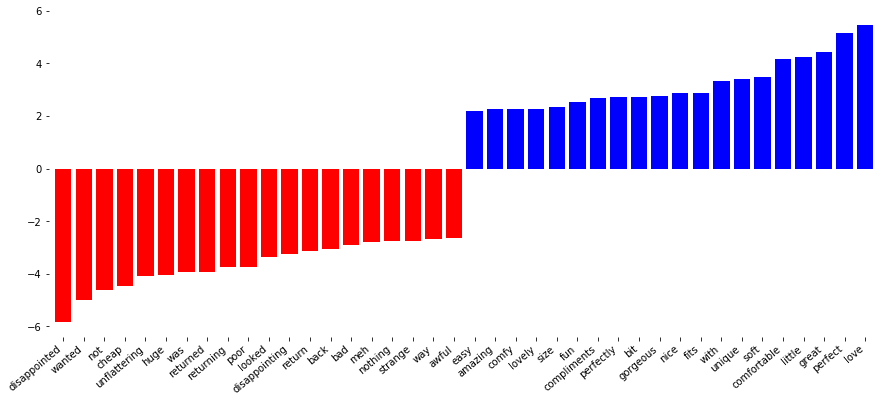

In [85]:
# feature importance graph
plt.figure(figsize=(15, 6))
plot_important_features(coef, np.array(feature_names), top_n=20, rotation=40)
ax = plt.gca()

### Compared with part 1.3, when using tfidfvectorizer, the cv score on training set has been improved slightly from 0.9368 to 0.9451. The important features with related coefficients also changed. For example, many new words with high weight appears such as love, fit, return, was and so on.

### 2.2 Remember that TfidfVectorizer uses normalization by default. Does using a Normalizer (sklearn.preprocessing.Normalizer) with CountVectorizer change the outcome? 

In [204]:
from sklearn.preprocessing import Normalizer
X_train = train['total']
X_test = test['total']
y_train = train['Recommended'].ravel()
y_test = test['Recommended'].ravel()

In [205]:
param_grid_log = { 'logisticregression__C': [0.01,0.1,1,10]}
pipe_log_total_norm = make_pipeline(Normalizer(),CountVectorizer(), LogisticRegression(), memory="cache_folder")  
grid_log_total_norm = GridSearchCV(pipe_log_total_1, param_grid_log, scoring='roc_auc') 

In [207]:
grid_log_total_norm.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory='cache_folder',
     steps=[('countvectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
  ...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'logisticregression__C': [0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [211]:
print("Best training score before normalizing:", grid_log_total_1.best_score_)
print("Best training score after normalizing:", grid_log_total_norm.best_score_)

Best training score before normalizing: 0.9368535828985899
Best training score after normalizing: 0.9368535828985899


With normalizer, the behavior didn't improve at all.

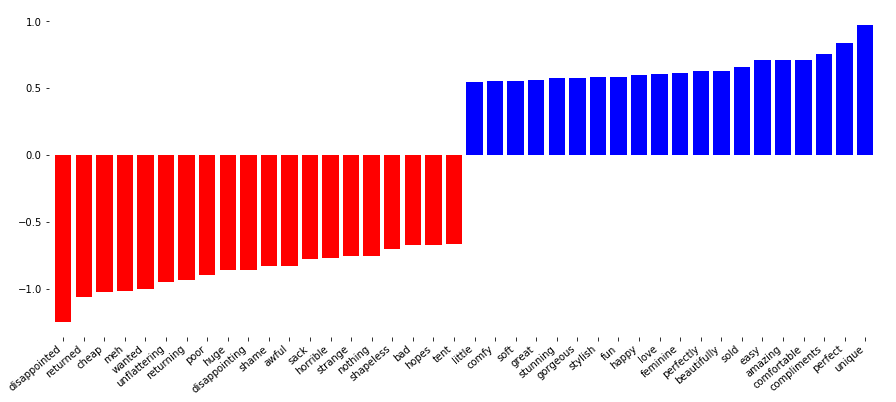

In [212]:
# Use the pipeline best estimator attributes to extract the names and coefficient
feature_names = grid_log_total_norm.best_estimator_.named_steps['countvectorizer'].get_feature_names()
coef = grid_log_total_norm.best_estimator_.named_steps['logisticregression'].coef_.ravel()

# feature importance graph
plt.figure(figsize=(15, 6))
plot_important_features(coef, np.array(feature_names), top_n=20, rotation=40)
ax = plt.gca()

### The auc score didn't improve. The important feature coef also didn't change with Normalizer. 

### 2.3 Try using stop-word. Do the standard English stop-words help? Why / why not? 

### 2.3.1 Try stop words on tfidf vectorizer

In [266]:
param_grid_log = { 'logisticregression__C': np.logspace(-3, 3, 7)}
pipe_log_stop = make_pipeline(TfidfVectorizer(stop_words='english'), LogisticRegression(), memory="cache_folder")  
grid_log_stop = GridSearchCV(pipe_log_stop, param_grid_log, scoring='roc_auc') 

In [267]:
X_train = train['total']
X_test = test['total']
grid_log_stop.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory='cache_folder',
     steps=[('tfidfvectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_i...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'logisticregression__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [226]:
print("Best regularization for log regression:", grid_log_stop.best_params_)
print("Best training score for log after tuning:", grid_log_stop.best_score_)

Best regularization for log regression: {'logisticregression__C': 1.0}
Best training score for log after tuning: 0.9369346714788329


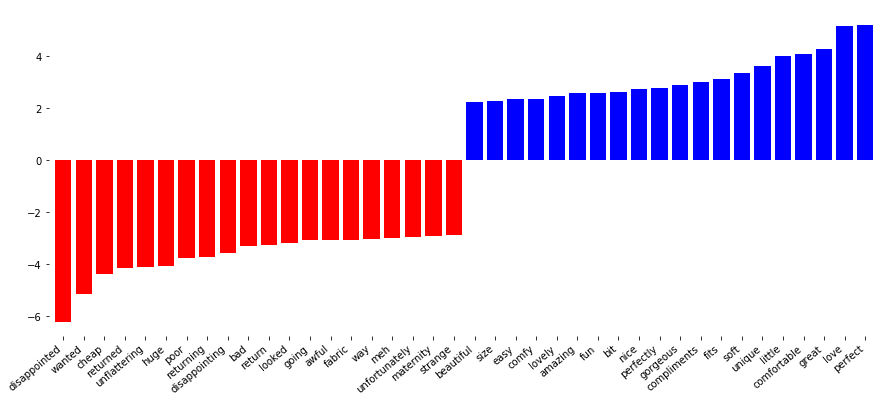

In [227]:
# Use the pipeline best estimator attributes to extract the names and coefficient
feature_names = grid_log_stop.best_estimator_.named_steps['tfidfvectorizer'].get_feature_names()
coef = grid_log_stop.best_estimator_.named_steps['logisticregression'].coef_.ravel()

# feature importance graph
plt.figure(figsize=(15, 6))
plot_important_features(coef, np.array(feature_names), top_n=20, rotation=40)
ax = plt.gca()

### For tfidf vectorizer, the results didn't improve with english stop words.

### 2.3.2 Try stop words on count vectorizer:

In [228]:
param_grid_log = { 'logisticregression__C': np.logspace(-3, 3, 7)}
pipe_log_stop_2 = make_pipeline(CountVectorizer(stop_words='english'), LogisticRegression(), memory="cache_folder")  
grid_log_stop_2 = GridSearchCV(pipe_log_stop_2, param_grid_log, scoring='roc_auc') 

In [229]:
grid_log_stop_2.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory='cache_folder',
     steps=[('countvectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'logisticregression__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [230]:
print("Best regularization for log regression:", grid_log_stop_2.best_params_)
print("Best training score for log after tuning:", grid_log_stop_2.best_score_)

Best regularization for log regression: {'logisticregression__C': 0.1}
Best training score for log after tuning: 0.9287267625006028


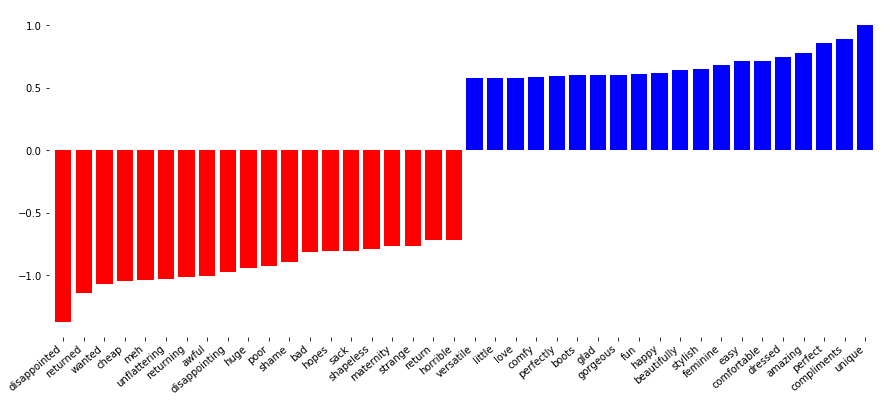

In [275]:
# Use the pipeline best estimator attributes to extract the names and coefficient
feature_names = grid_log_stop_2.best_estimator_.named_steps['countvectorizer'].get_feature_names()
coef = grid_log_stop_2.best_estimator_.named_steps['logisticregression'].coef_.ravel()

# feature importance graph
plt.figure(figsize=(15, 6))
plot_important_features(coef, np.array(feature_names), top_n=20, rotation=40)
ax = plt.gca()

### The result also didn't improve for countvectorizer

### Task 2.3 Conclusion:

### According to class lecture: For supervised learning english stop words often have little effect on large corpuses (on small corpuses and for unsupervised learning it can help). The stop word list in sklearn is around 200, which is too small compared with our feature space. The model itself could decide which word is important or not.

### 2.4 Limit the vocabulary using min_df or max_df. How to these impact the number of features, and how do they impact the scores?

First check previous feature names numbers

In [269]:
feature_names = grid_log.best_estimator_.named_steps['tfidfvectorizer'].get_feature_names()
len(feature_names)

13010

### 2.4.1 Try only restrict min_df 

In [242]:
param_grid_log = { 'logisticregression__C': [0.01,0.1,1],
                 'tfidfvectorizer__min_df':[2,3,4]}
pipe_log_mindf = make_pipeline(TfidfVectorizer(), LogisticRegression(), memory="cache_folder")  
grid_log_mindf = GridSearchCV(pipe_log_mindf, param_grid_log, scoring='roc_auc') 

In [243]:
X_train = train['total']
grid_log_mindf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory='cache_folder',
     steps=[('tfidfvectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_i...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'logisticregression__C': [0.01, 0.1, 1], 'tfidfvectorizer__min_df': [2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [244]:
print("Best regularization for log regression:", grid_log_mindf.best_params_)
print("Best training score for log after tuning:", grid_log_mindf.best_score_)

Best regularization for log regression: {'logisticregression__C': 1, 'tfidfvectorizer__min_df': 3}
Best training score for log after tuning: 0.9453109613010596


In [250]:
feature_names = grid_log_mindf.best_estimator_.named_steps['tfidfvectorizer'].get_feature_names()

In [251]:
len(feature_names)

5848

### By only restricting on min_df, results improve a little from 0.9450 to 0.9453.

### There is a great decrease on feature numbers, from 13010 to 5848.

### Try only restrict max_df

In [17]:
param_grid_log = { 'logisticregression__C': [0.01,0.1,1],
                 'tfidfvectorizer__max_df':[100, 200, 300, 400, 500]}
pipe_log_maxdf = make_pipeline(TfidfVectorizer(), LogisticRegression(), memory="cache_folder")  
grid_log_maxdf = GridSearchCV(pipe_log_maxdf, param_grid_log, scoring='roc_auc') 

In [18]:
X_train = train['total']
grid_log_maxdf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory='cache_folder',
     steps=[('tfidfvectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_i...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'logisticregression__C': [0.01, 0.1, 1], 'tfidfvectorizer__max_df': [100, 200, 300, 400, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [19]:
print("Best regularization for log regression:", grid_log_maxdf.best_params_)
print("Best training score for log after tuning:", grid_log_maxdf.best_score_)

Best regularization for log regression: {'logisticregression__C': 1, 'tfidfvectorizer__max_df': 500}
Best training score for log after tuning: 0.9186270614449624


In [20]:
feature_names = grid_log_maxdf.best_estimator_.named_steps['tfidfvectorizer'].get_feature_names()

In [21]:
len(feature_names)

12730

### By only restricting on max_df, results didn't improve much.

### There is a slight decrease on feature numbers, from 13010 to 12730 when max_df = 500.

### Task 2 Conclusion: 

### Among all the approaches in Task 2, setting min_df would make our model behave better, let's see how it performs on the test set:

In [270]:
print("Best training score for Task 2 after tuning:", grid_log_mindf.best_score_)
print("Score on test set for Task 2 after tuning:", grid_log_mindf.score(X_test, y_test))

Best training score for Task 2 after tuning: 0.9453109613010596
Score on test set for Task 2 after tuning: 0.9417408049442416


## Task 3 

### 3.1 Using your current best model, try changing from unigrams to n-grams of varying length. What provides the best performance? Visualize the coefficients. Try visualizing only the higher-order n-grams that are important.

Our current best model: Logistic regression, C = 1, min_df = 3, no stop words.

### 3.1.1 Tune n-grams 

In [272]:
param_grid_log = {'tfidfvectorizer__ngram_range':[(1,3),(1,4),(1,5)]}
pipe_log_ngram = make_pipeline(TfidfVectorizer(min_df=3), LogisticRegression(C=1), memory="cache_folder")  
grid_log_ngram = GridSearchCV(pipe_log_ngram, param_grid_log, scoring='roc_auc') 

In [273]:
X_train = train['total']
grid_log_ngram.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory='cache_folder',
     steps=[('tfidfvectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=3,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_i...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'tfidfvectorizer__ngram_range': [(1, 3), (1, 4), (1, 5)]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [274]:
print("Best regularization for log regression:", grid_log_ngram.best_params_)
print("Best training score for log after tuning:", grid_log_ngram.best_score_)

Best regularization for log regression: {'tfidfvectorizer__ngram_range': (1, 3)}
Best training score for log after tuning: 0.9475285945551648


### In my mode (1-3)gram works best. And will give a 0.9475 AUC cv score on train set.

### 3.1.2 Visualize important coefficients 

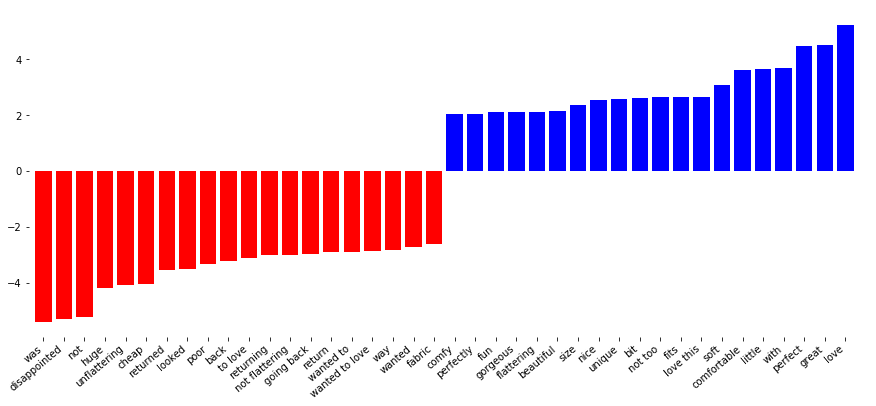

In [277]:
# Use the pipeline best estimator attributes to extract the names and coefficient
feature_names = grid_log_ngram.best_estimator_.named_steps['tfidfvectorizer'].get_feature_names()
coef = grid_log_ngram.best_estimator_.named_steps['logisticregression'].coef_.ravel()

# feature importance graph
plt.figure(figsize=(15, 6))
plot_important_features(coef, np.array(feature_names), top_n=20, rotation=40)
ax = plt.gca()

### 3.1.3 Visualize important non unigram coefficients 

In [38]:
len(feature_names), len(coef)

(121428, 121428)

In [72]:
higher_feature_names = []
higher_coef = []

for i in range(len(feature_names)):
    if len(feature_names[i].split())>1:
        higher_feature_names.append(feature_names[i])
        higher_coef.append(coef[i])

2nd and 3rd order

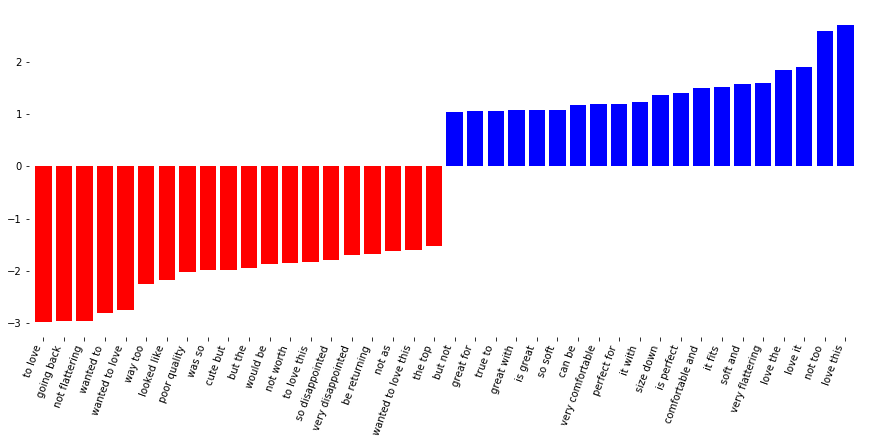

In [73]:
plt.figure(figsize=(15, 6))
plot_important_features(np.array(higher_coef).ravel(), np.array(higher_feature_names), top_n=20, rotation=70)
ax = plt.gca()

3rd order

In [74]:
higher_feature_names = []
higher_coef = []

for i in range(len(feature_names)):
    if len(feature_names[i].split())>2:
        higher_feature_names.append(feature_names[i])
        higher_coef.append(coef[i])

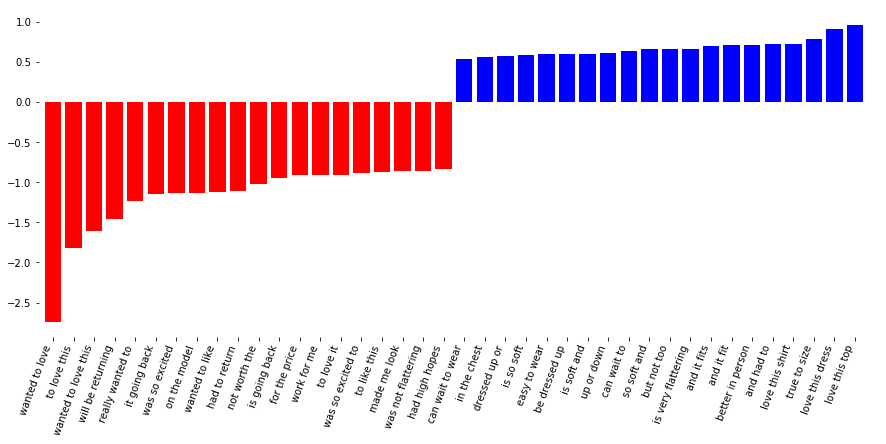

In [75]:
plt.figure(figsize=(15, 6))
plot_important_features(np.array(higher_coef).ravel(), np.array(higher_feature_names), top_n=20, rotation=70)
ax = plt.gca()

### 3.2 Try using character n-grams. Visualize the coefficients. Can we learn something from this?


In [77]:
param_grid_log = {'tfidfvectorizer__ngram_range':[(2,5),(3,6)],
                 'logisticregression__C':[0.01,0.1,1]}
pipe_log_changram = make_pipeline(TfidfVectorizer(analyzer="char_wb"), LogisticRegression(), memory="cache_folder")  
grid_log_changram = GridSearchCV(pipe_log_changram, param_grid_log, scoring='roc_auc') 

In [78]:
X_train = train['total']
grid_log_changram.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory='cache_folder',
     steps=[('tfidfvectorizer', TfidfVectorizer(analyzer='char_wb', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smoot...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'tfidfvectorizer__ngram_range': [(2, 5), (3, 6)], 'logisticregression__C': [0.01, 0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [81]:
print("Best parameter for log regression:", grid_log_changram.best_params_)
print("Best training score for log after tuning:", grid_log_changram.best_score_)

Best parameter for log regression: {'logisticregression__C': 1, 'tfidfvectorizer__ngram_range': (3, 6)}
Best training score for log after tuning: 0.9450617053007202


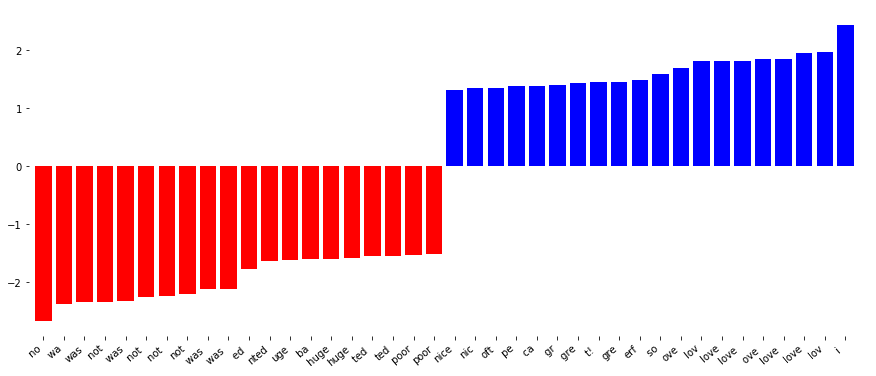

In [80]:
# Use the pipeline best estimator attributes to extract the names and coefficient
feature_names = grid_log_changram.best_estimator_.named_steps['tfidfvectorizer'].get_feature_names()
coef = grid_log_changram.best_estimator_.named_steps['logisticregression'].coef_.ravel()

# feature importance graph
plt.figure(figsize=(15, 6))
plot_important_features(coef, np.array(feature_names), top_n=20, rotation=40)
ax = plt.gca()

### We can see the result is quite intuitive. First, it gives us an auc score that is almost as goog as our best model. Then, through gridsearch, (3,6) grams performs better than (2,5) which may hint longer words may contain more information that is useful to our model.

### From the visualzation: words such as wa, was, no, poor would lead to a bad result, word such as lov, love, gre (refer to great) would lead to a good result to recommend the product.

### 3.3 Investigate how min_df and the use of stop-words changes the number of features when using word n-grams, and how they change the score.

Before 3.3, our best model has the following parameter: min_df = 3, n_gram = (1,3), no stop words, C = 1

It will lead to an AUC score of 0.9475 and have 121428 number of features.

### 3.3.1 Control on other variables, increase the min_df, check the change on number of features.

In [82]:
param_grid_log = {'tfidfvectorizer__min_df':[4,5,6]}
pipe_log_ngram_1 = make_pipeline(TfidfVectorizer(ngram_range = (1,3)), LogisticRegression(C=1), memory="cache_folder")  
grid_log_ngram_1 = GridSearchCV(pipe_log_ngram_1, param_grid_log, scoring='roc_auc') 

In [83]:
X_train = train['total']
grid_log_ngram_1.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory='cache_folder',
     steps=[('tfidfvectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 3), norm='l2', preprocessor=None, smooth_i...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'tfidfvectorizer__min_df': [4, 5, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [85]:
print("Best parameter for log regression:", grid_log_ngram_1.best_params_)
print("Best training score for log after tuning:", grid_log_ngram_1.best_score_)

Best parameter for log regression: {'tfidfvectorizer__min_df': 6}
Best training score for log after tuning: 0.9483253343101751


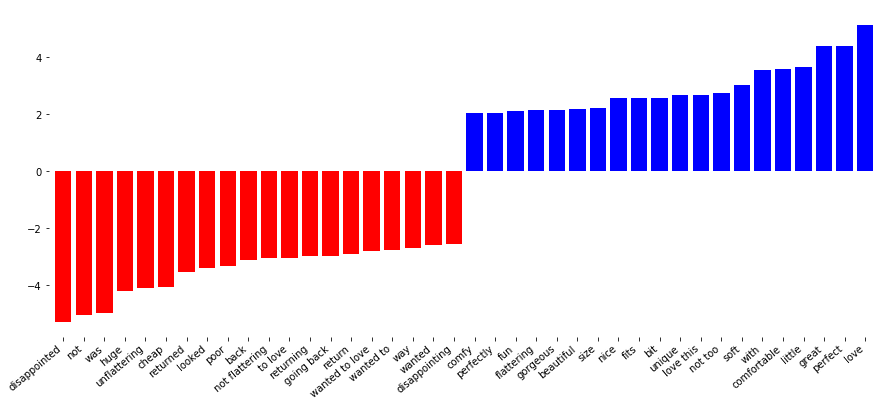

In [86]:
feature_names = grid_log_ngram_1.best_estimator_.named_steps['tfidfvectorizer'].get_feature_names()
coef = grid_log_ngram_1.best_estimator_.named_steps['logisticregression'].coef_.ravel()

# feature importance graph
plt.figure(figsize=(15, 6))
plot_important_features(coef, np.array(feature_names), top_n=20, rotation=40)
ax = plt.gca()

In [87]:
len(feature_names)

42787

### Effect of min_df, when others remains same, increase min_df will decrease the number of features. For example, increasing min_df from 3 to 6, will drop the number of features to 42787, and will lead to an almost unchanged score.

### 3.3.2 Use stop words, to check its effect on feature number and scores.

In [88]:
param_grid_log = {'logisticregression__C':[0.1,1, 10]}
pipe_log_ngram_2 = make_pipeline(TfidfVectorizer(min_df = 3, ngram_range = (1,3),stop_words='english')
                                 , LogisticRegression(), memory="cache_folder")  
grid_log_ngram_2 = GridSearchCV(pipe_log_ngram_2, param_grid_log, scoring='roc_auc') 

In [89]:
X_train = train['total']
grid_log_ngram_2.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory='cache_folder',
     steps=[('tfidfvectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=3,
        ngram_range=(1, 3), norm='l2', preprocessor=None, smooth_i...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'logisticregression__C': [0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [90]:
print("Best parameter for log regression:", grid_log_ngram_2.best_params_)
print("Best training score for log after tuning:", grid_log_ngram_2.best_score_)

Best parameter for log regression: {'logisticregression__C': 1}
Best training score for log after tuning: 0.9400705930846301


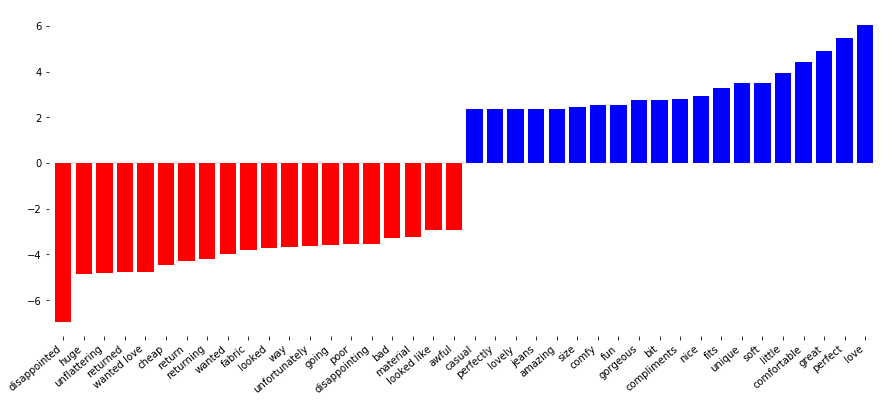

In [91]:
feature_names = grid_log_ngram_2.best_estimator_.named_steps['tfidfvectorizer'].get_feature_names()
coef = grid_log_ngram_2.best_estimator_.named_steps['logisticregression'].coef_.ravel()

# feature importance graph
plt.figure(figsize=(15, 6))
plot_important_features(coef, np.array(feature_names), top_n=20, rotation=40)
ax = plt.gca()

In [92]:
len(feature_names)

40154

### Using stop_words also doesn't have much influence on score, but greatly decrease the number of features to 40154.

### 3.3.3 Search for the final model for Task 3

In [93]:
#min 3, 6 because they were best in previous model, also try (1,2) because haven't tried before

param_grid_log = {'tfidfvectorizer__min_df':[3,6,7],
                 'tfidfvectorizer__ngram_range':[(1,2),(1,3)],
                 'logisticregression__C':[0.1,1,2.5,3]}
pipe_log_ngram_final = make_pipeline(TfidfVectorizer(), LogisticRegression( ), memory="cache_folder")  
grid_log_ngram_final = GridSearchCV(pipe_log_ngram_final, param_grid_log, scoring='roc_auc') 

In [94]:
X_train = train['total']
grid_log_ngram_final.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory='cache_folder',
     steps=[('tfidfvectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_i...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'tfidfvectorizer__min_df': [3, 6, 7], 'tfidfvectorizer__ngram_range': [(1, 2), (1, 3)], 'logisticregression__C': [0.1, 1, 2.5, 3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [95]:
print("Best parameter for log regression:", grid_log_ngram_final.best_params_)
print("Best training score for log after tuning:", grid_log_ngram_final.best_score_)

Best parameter for log regression: {'logisticregression__C': 3, 'tfidfvectorizer__min_df': 3, 'tfidfvectorizer__ngram_range': (1, 2)}
Best training score for log after tuning: 0.9517154344002899


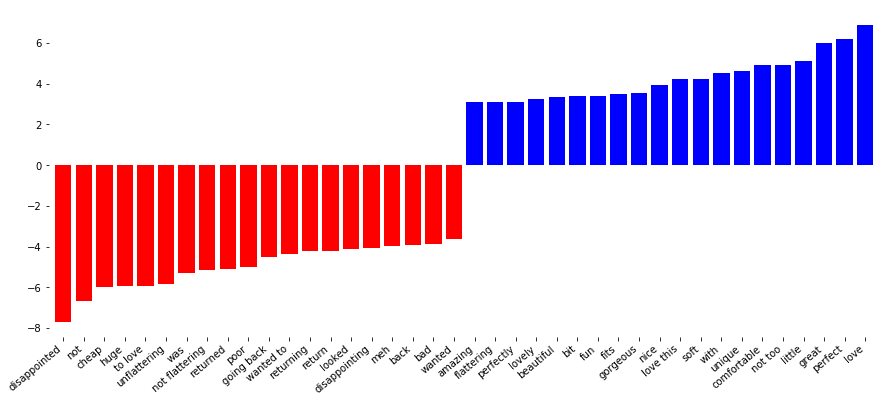

In [96]:
feature_names = grid_log_ngram_final.best_estimator_.named_steps['tfidfvectorizer'].get_feature_names()
coef = grid_log_ngram_final.best_estimator_.named_steps['logisticregression'].coef_.ravel()

# feature importance graph
plt.figure(figsize=(15, 6))
plot_important_features(coef, np.array(feature_names), top_n=20, rotation=40)
ax = plt.gca()

In [97]:
len(feature_names)

48394

### Task 3 Conclusion: Finally we got our best model for Task 3, which gives us an AUC score 0.952 on the train data with cross validation.

### Here is its parameter: C=3, min_df=3, ngram_range=(1,2), without English stop words. Has a feature number of 48394.

### Let's see how it performs on the test set.

In [103]:
print("Best training score for Task 3 after tuning:", grid_log_ngram_final.best_score_)
print("Score on test set for Task 3 after tuning:", grid_log_ngram_final.score(X_test, y_test))

Best training score for Task 3 after tuning: 0.9517154344002899
Score on test set for Task 3 after tuning: 0.8849182799588695


### Though it's not intended, we found that even with a higher train score, this model worse than the final model generated in task 2. We may refer that in this dataset, when using the ngram parameter, it slightly overfits the data, and that's why a better score leads to a worse test score.

### After all, this is the best we can get from task3, we will remain the features and run other linear model with this setting.

## Task 4

### 4.1 Revisit your choice of model. Compare different linear models with L1 and L2 penalty on the best performing features from Task 3.

In [14]:
from sklearn.linear_model import RidgeClassifier


In [17]:

param_grid_ridge = {'tfidfvectorizer__min_df':[3],
                 'tfidfvectorizer__ngram_range':[(1,2)],
                 'ridgeclassifier__alpha':[0.1,1,2.5,3]}
pipe_ridge_ngram_final = make_pipeline(TfidfVectorizer(), RidgeClassifier( ), memory="cache_folder")  
grid_ridge_ngram_final = GridSearchCV(pipe_ridge_ngram_final, param_grid_ridge, scoring='roc_auc')  

In [18]:
X_train = train['total']
grid_ridge_ngram_final.fit(X_train, y_train)
print("Best parameter for ridge regression:", grid_ridge_ngram_final.best_params_)
print("Best training score for ridge after tuning:", grid_ridge_ngram_final.best_score_)


Best parameter for ridge regression: {'ridgeclassifier__alpha': 3, 'tfidfvectorizer__min_df': 3, 'tfidfvectorizer__ngram_range': (1, 2)}
Best training score for ridge after tuning: 0.950416839134172


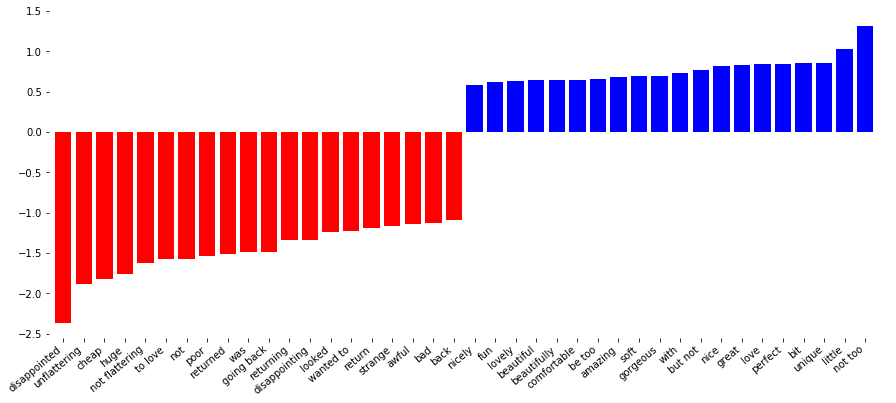

In [19]:
feature_names = grid_ridge_ngram_final.best_estimator_.named_steps['tfidfvectorizer'].get_feature_names()
coef = grid_ridge_ngram_final.best_estimator_.named_steps['ridgeclassifier'].coef_.ravel()

# feature importance graph
plt.figure(figsize=(15, 6))
plot_important_features(coef, np.array(feature_names), top_n=20, rotation=40)
ax = plt.gca()

In [20]:
from sklearn.svm import LinearSVC

In [21]:
param_grid_svc = {'tfidfvectorizer__min_df':[3],
                 'tfidfvectorizer__ngram_range':[(1,2)],
                 'linearsvc__C':[0.1,1,2.5,3]}
pipe_svc_ngram_final = make_pipeline(TfidfVectorizer(), LinearSVC( ), memory="cache_folder")  
grid_svc_ngram_final = GridSearchCV(pipe_svc_ngram_final, param_grid_svc, scoring='roc_auc')  
X_train = train['total']
grid_svc_ngram_final.fit(X_train, y_train)
print("Best parameter for svc regression:", grid_svc_ngram_final.best_params_)
print("Best training score for svc after tuning:", grid_svc_ngram_final.best_score_)


Best parameter for svc regression: {'linearsvc__C': 0.1, 'tfidfvectorizer__min_df': 3, 'tfidfvectorizer__ngram_range': (1, 2)}
Best training score for svc after tuning: 0.9495783321562782


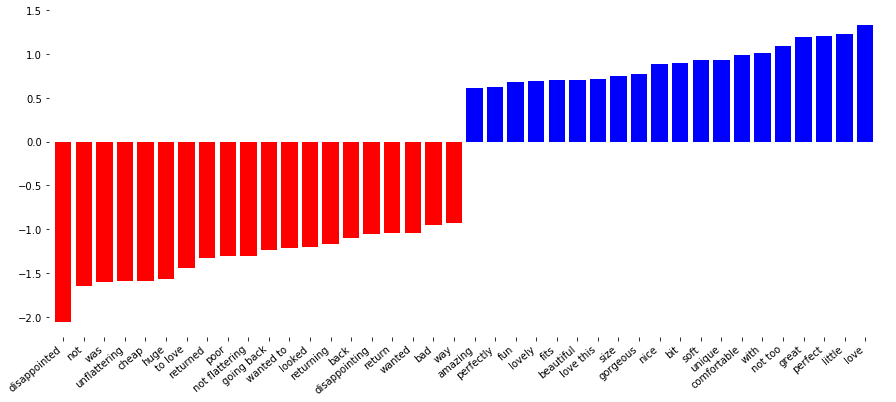

In [22]:
feature_names = grid_svc_ngram_final.best_estimator_.named_steps['tfidfvectorizer'].get_feature_names()
coef = grid_svc_ngram_final.best_estimator_.named_steps['linearsvc'].coef_.ravel()

# feature importance graph
plt.figure(figsize=(15, 6))
plot_important_features(coef, np.array(feature_names), top_n=20, rotation=40)
ax = plt.gca()

Best parameter for log regression: {'logisticregression__C': 2.5, 'tfidfvectorizer__min_df': 3, 'tfidfvectorizer__ngram_range': (1, 2)}
Best training score for log after tuning: 0.9467194852459746


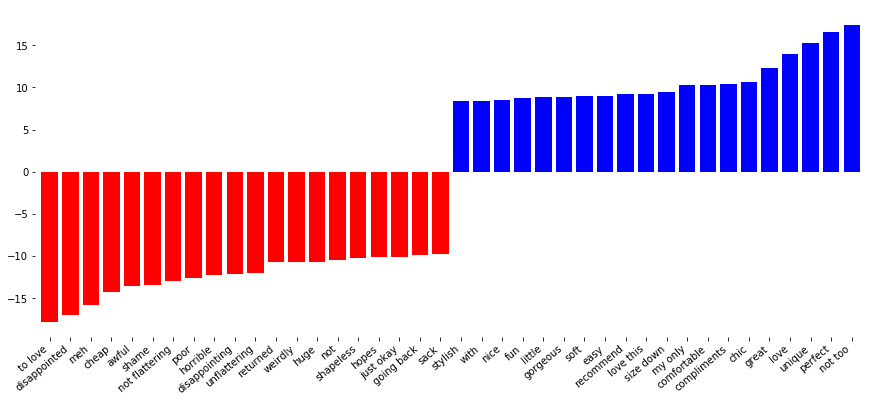

In [23]:
param_grid_log = {'tfidfvectorizer__min_df':[3],
                 'tfidfvectorizer__ngram_range':[(1,2)],
                 'logisticregression__C':[0.1,1,2.5,3]}
pipe_log_ngram_final = make_pipeline(TfidfVectorizer(), LogisticRegression( penalty='l1'), memory="cache_folder")  
grid_log_ngram_final = GridSearchCV(pipe_log_ngram_final, param_grid_log, scoring='roc_auc')
X_train = train['total']
grid_log_ngram_final.fit(X_train, y_train)
print("Best parameter for log regression:", grid_log_ngram_final.best_params_)
print("Best training score for log after tuning:", grid_log_ngram_final.best_score_)
feature_names = grid_log_ngram_final.best_estimator_.named_steps['tfidfvectorizer'].get_feature_names()
coef = grid_log_ngram_final.best_estimator_.named_steps['logisticregression'].coef_.ravel()

# feature importance graph
plt.figure(figsize=(15, 6))
plot_important_features(coef, np.array(feature_names), top_n=20, rotation=40)
ax = plt.gca()

The best training score comes from the RidgeClassifier model, we will evaluate testscore here with this model.

In [24]:
print("Test Score for ridge model:", grid_ridge_ngram_final.score(X_test, y_test))

Test Score for ridge model: 0.9519053052556591


We can observe that the test score is pretty good here

In the above 3 models, we have choose the best parameter in part3 and taken min_df to be 3 and the ngram to be (1,2). The 3 linear models we have used are L1 logisticRegression, L2 RidgeClassifier, and LinearSVC. From the result we can observe the best performance comes from L2 RidgeClassifier for  training. It is a better model among the 3. Hence, we can see that in general for this question, l2 works better than l1. At the same time, although it underperforms out training score in part3, the test score is much better.

### 4.2 Are there any other obvious features to try, or combinations to try out? (Don’t perform them, just list them).

1.Beside using n-gram, skipgram is also a valid consideration


2.We could also consider the length of each review. If we have a super long review (for example in       extreme 1 10000-word review with y=0 and , 5000 1-word review with y=1) we can adjust for this to reduce bias caused by certain extreme reviews.


3.we can consider word2vec representation.
